In [69]:
from sklearn.datasets import fetch_lfw_people
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
display(df)

{'data': array([[0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533,
         0.3803922 ],
        [0.14771242, 0.19738562, 0.1751634 , ..., 0.45751634, 0.44444445,
         0.53594774],
        [0.34379086, 0.39477125, 0.49150327, ..., 0.709804  , 0.72156864,
         0.7163399 ],
        ...,
        [0.3633987 , 0.3372549 , 0.30718955, ..., 0.19738562, 0.22091503,
         0.19346406],
        [0.19346406, 0.24705882, 0.34248367, ..., 0.7346406 , 0.6640523 ,
         0.6117647 ],
        [0.11633987, 0.10196079, 0.1267974 , ..., 0.13333334, 0.13725491,
         0.2535948 ]], dtype=float32),
 'images': array([[[0.9973857 , 0.99607843, 0.9921568 , ..., 0.29803923,
          0.24836601, 0.20653595],
         [0.9973857 , 0.9921569 , 0.9908497 , ..., 0.30588236,
          0.2535948 , 0.21568628],
         [0.96078426, 0.93071896, 0.8679738 , ..., 0.2875817 ,
          0.24183007, 0.21568628],
         ...,
         [0.34509805, 0.26143792, 0.17385621, ..., 0.4248366 ,
     

In [3]:
I = df['images'].shape
T = df['target'].shape
D = df['data'].shape
TN = df['target_names'].shape
print(I, T, D, TN)
#1288 number of total samples
#1850 is flattened image (height * width) each image has height and width

(1288, 50, 37) (1288,) (1288, 1850) (7,)


In [4]:
for name in df.target_names:
    print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


In [6]:
df = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
data = df.images
has_null = np.isnan(data).any()
print(has_null)

False


In [7]:
df = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
data = df.target
has_null = np.isnan(data).any()
print(has_null)

False


In [8]:
df = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
data = df.data
has_null = np.isnan(data).any()
print(has_null)

False


In [9]:
print(df['data'].shape[1])

1850


In [249]:
print(df3['target'].value_counts())

target
3    530
1    236
6    144
2    121
4    109
0     77
5     71
Name: count, dtype: int64


In [11]:
df2 = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
data = df2['data']
target = df2['target']
print(f"Verify the shape of data is similar to original data in the dataset: {data.shape}")
print(f"Verify the shape of the target is similar to original target in the dataset: {target.shape}")
df3 = pd.DataFrame(data)
df3['target'] = target
print(f"The shape of df3 after adding target column to the dataframe: {df3.shape}")
sampled_df = df3.groupby('target', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 70), random_state=42))
sampled_df = sampled_df.reset_index(drop=True)
sampled_data = sampled_df.iloc[:, :-1].values  
sampled_target = sampled_df['target'].values
print()
display(sampled_data)
print()
display(sampled_target)
print()
size = sampled_data.shape[0]
print(f'After sampling, the data should be 490 total rows: {size}')
print()
count = np.count_nonzero(sampled_target == 0)
print(f'The number of samples for class/target 0 is: {count}')
print()
size2 = sampled_target.shape[0]
print(f'After sampling, the target should be 490 total rows: {size2}')
print()
print('The dataframe after sampling:', df3.head())
print()
np.save('sampled_data.npy', sampled_data)
print('Saved sampled data')
np.save('sampled_target.npy', sampled_target)
print('Saved sampled target')
print()
loaded_data = np.load('sampled_data.npy')
print('Loaded data successfully')
loaded_target = np.load('sampled_target.npy')
print('Loaded target successfully')



Verify the shape of data is similar to original data in the dataset: (1288, 1850)
Verify the shape of the target is similar to original target in the dataset: (1288,)
The shape of df3 after adding target column to the dataframe: (1288, 1851)



C:\Users\ERC\AppData\Local\Temp\ipykernel_19712\3936770745.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df3.groupby('target', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 70), random_state=42))


array([[0.58562094, 0.54901963, 0.46797386, ..., 0.26143792, 0.4130719 ,
        0.54509807],
       [0.46928108, 0.62222224, 0.7294118 , ..., 0.67843145, 0.72287583,
        0.7568627 ],
       [0.5908497 , 0.5620915 , 0.5254902 , ..., 0.44444445, 0.18692811,
        0.13986929],
       ...,
       [0.22745098, 0.2627451 , 0.33202615, ..., 0.8653595 , 0.6993465 ,
        0.20392157],
       [0.27058825, 0.24705882, 0.33071896, ..., 0.551634  , 0.48366013,
        0.44836602],
       [0.6640523 , 0.5882353 , 0.50065356, ..., 0.9895425 , 0.9620915 ,
        0.56993467]], dtype=float32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,


After sampling, the data should be 490 total rows: 490

The number of samples for class/target 0 is: 70

After sampling, the target should be 490 total rows: 490

The dataframe after sampling:           0         1         2         3         4         5         6  \
0  0.997386  0.996078  0.992157  0.966013  0.758170  0.569935  0.700654   
1  0.147712  0.197386  0.175163  0.192157  0.385621  0.473203  0.543791   
2  0.343791  0.394771  0.491503  0.555556  0.597386  0.611765  0.606536   
3  0.047059  0.016993  0.023529  0.016993  0.031373  0.230065  0.677124   
4  0.471895  0.458824  0.486275  0.499346  0.494118  0.513726  0.545098   

          7         8         9  ...      1841      1842      1843      1844  \
0  0.794771  0.784314  0.767320  ...  0.426144  0.422222  0.415686  0.401307   
1  0.615686  0.671895  0.694118  ...  0.239216  0.296732  0.307190  0.325490   
2  0.626144  0.640523  0.652288  ...  0.430065  0.379085  0.410458  0.498039   
3  0.667974  0.641830  0.400000  ..

In [12]:
n_samples, h, w = df2.images.shape
X = loaded_data
Y = loaded_target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

n_components = 150
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train_std)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print("done in %0.3fs" % (time() - t0))


done in 28.448s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.018s


In [13]:
display(X_train_pca, X_test_pca)
print()
print('After pca the shapes are shown respectively:', X_train_pca.shape, X_test_pca.shape)
print('The shape of the target column train and test:', y_train.shape, y_test.shape)

array([[-1.207905  ,  1.1613948 ,  0.48205197, ..., -0.51821816,
        -1.246952  , -0.45760158],
       [-0.6483744 , -1.1380733 , -0.02074195, ...,  1.9046571 ,
        -0.25982115,  1.4324101 ],
       [-0.9888585 ,  1.2370524 ,  1.7171677 , ...,  0.12591888,
        -0.6392489 ,  1.7199885 ],
       ...,
       [-0.04979475,  0.73132706,  0.00880026, ..., -1.4877026 ,
         1.0760734 , -0.06625256],
       [-0.05325023,  0.6006851 ,  0.36193702, ...,  0.2980895 ,
         0.45742896, -0.5638294 ],
       [-1.0197564 , -0.9934872 , -0.06373879, ..., -0.59763634,
        -0.5970282 ,  1.721661  ]], dtype=float32)

array([[-0.58394945, -0.5209933 , -0.4954352 , ..., -0.950903  ,
        -0.22183949, -0.5012223 ],
       [-1.6334407 , -2.282882  ,  0.60905236, ..., -1.0755212 ,
        -1.2344347 ,  1.0349686 ],
       [-1.583526  , -1.521722  , -0.52833074, ..., -0.24838272,
        -3.4799862 , -1.2333692 ],
       ...,
       [-0.56165195, -0.4620959 , -0.12903152, ..., -0.2382658 ,
        -1.1839894 ,  0.7473812 ],
       [ 0.4641508 , -0.31831992, -0.9541382 , ..., -2.517888  ,
        -0.15458345, -0.0459288 ],
       [-1.2796235 , -2.2738967 ,  1.8049456 , ...,  1.4733602 ,
        -0.8785046 ,  0.3567408 ]], dtype=float32)


After pca the shapes are shown respectively: (343, 150) (147, 150)
The shape of the target column train and test: (343,) (147,)


In [71]:
#---------------------------------------PERCEPTRON

In [ ]:
n_samples, h, w = df2.images.shape
X = loaded_data
Y = loaded_target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

n_components = 150
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train_std)
eigenfaces = pca.components_.reshape((n_components, h, w))
t0 = time()
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [41]:
model = Pipeline([
        ('perceptron', Perceptron(random_state = 1))])
# Taken from scikit learn Perceptron
param_grid = {'perceptron__penalty': ['elasticnet'],
              'perceptron__l1_ratio': [0.1, 0.5, 0.9],
              'perceptron__alpha': [0.0001, 0.001, 0.01, 0.1],
              'perceptron__max_iter': [100, 500, 1000, 1500],
              'perceptron__eta0': [1, 0.1, 0.01, 0.001]}
#Reducing the hyperparams increases the accuracy but dcreases the validation result
gs = GridSearchCV(estimator=model, param_grid = param_grid, scoring = 'accuracy', cv = 10, n_jobs =1)
gs.fit(X_train_pca, y_train)
print(f'The best parameter for Perceptron is: {gs.best_params_}')
print(f'The best cross validation score/accuracy for Perceptron is: {gs.best_score_:.3f}')

The best parameter for Perceptron is: {'perceptron__alpha': 0.001, 'perceptron__eta0': 0.1, 'perceptron__l1_ratio': 0.1, 'perceptron__max_iter': 100, 'perceptron__penalty': 'elasticnet'}
The best cross validation score/accuracy for Perceptron is: 0.621


In [42]:
p1 = gs.best_estimator_
p1.fit(X_train_pca, y_train)
print('The training accuracy of perceptron is: %.3f' % p1.score(X_train_pca, y_train))
print('The testing accuracy of perceptron is: %.3f' % p1.score(X_test_pca, y_test))


The training accuracy of perceptron is: 1.000
The testing accuracy of perceptron is: 0.707


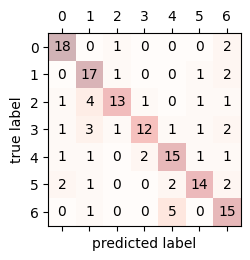

The precision score for perceptron is: 0.722
Precision per class 0: 0.783
Precision per class 1: 0.630
Precision per class 2: 0.812
Precision per class 3: 0.800
Precision per class 4: 0.652
Precision per class 5: 0.778
Precision per class 6: 0.600


In [43]:
p1.fit(X_train_pca, y_train)
y_pred = p1.predict(X_test_pca)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
print('The precision score for perceptron is: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average = 'macro'))
pre_per_class = precision_score(y_true=y_test, y_pred=y_pred, average = None)
for i, precision in enumerate(pre_per_class):
    print(f"Precision per class {i}: {precision:.3f}")

In [ ]:
#---------------------------------------Logistic Regression

In [65]:
n_samples, h, w = df2.images.shape
X = loaded_data
Y = loaded_target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

n_components = 150
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train_std)
eigenfaces = pca.components_.reshape((n_components, h, w))
t0 = time()
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [66]:
model1 = Pipeline([
        ('lg', LogisticRegression(random_state = 1))])

# Taken from scikit learn Logistic Regression
param_grid = {'lg__penalty': ['elasticnet'],
              'lg__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
              'lg__max_iter': [100, 500, 1000, 1500],
              'lg__l1_ratio': [0.1, 0.5, 0.9],
              'lg__solver': ['saga']} 
# For logistic regression reducing the hyperparam reduces both the validation score and test accuracy
#sag and lbfgs will fail for elastic net based on scikit learn but just wanted to try it and the accuracy was lower so I used solver saga only
# had to add l1 ratio because elasticnet will fail otherwise

gs1 = GridSearchCV(estimator=model1, param_grid = param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)
gs1.fit(X_train_pca, y_train)
print(f'The best parameter for LogisticRegression is: {gs1.best_params_}')
print(f'The best cross validation score/accuracy for LogisticRegression is: {gs1.best_score_:.3f}')

The best parameter for LogisticRegression is: {'lg__C': 0.1, 'lg__l1_ratio': 0.5, 'lg__max_iter': 100, 'lg__penalty': 'elasticnet', 'lg__solver': 'saga'}
The best cross validation score/accuracy for LogisticRegression is: 0.709


In [67]:
lg1 = gs1.best_estimator_
lg1.fit(X_train_pca, y_train)
print('The training accuracy of logistic regression is: %.3f' % lg1.score(X_train_pca, y_train))
print('The testing accuracy of logistic regression is: %.3f' % lg1.score(X_test_pca, y_test))

The training accuracy of logistic regression is: 0.980
The testing accuracy of logistic regression is: 0.728


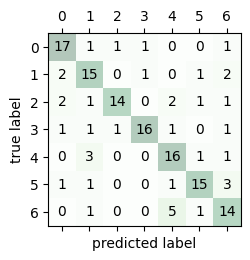


The precision score for LR is: 0.742
Precision per class 0: 0.739
Precision per class 1: 0.652
Precision per class 2: 0.875
Precision per class 3: 0.889
Precision per class 4: 0.640
Precision per class 5: 0.789
Precision per class 6: 0.609


In [68]:
lg1.fit(X_train_pca, y_train)
y_pred = lg1.predict(X_test_pca)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Greens, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
print()
print('The precision score for LR is: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average = 'macro'))
pre_per_class = precision_score(y_true=y_test, y_pred=y_pred, average = None)
for i, precision in enumerate(pre_per_class):
    print(f"Precision per class {i}: {precision:.3f}")

In [10]:
#--------------------------------- KNN

In [49]:
n_samples, h, w = df2.images.shape
X = loaded_data
Y = loaded_target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

n_components = 150
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train_std)
eigenfaces = pca.components_.reshape((n_components, h, w))
t0 = time()
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

model2 = Pipeline([
        ('knn', KNeighborsClassifier())])

# Taken from scikit learn KNN
param_grid = {'knn__n_neighbors': [3, 5, 7, 9],
              'knn__weights': ['uniform', 'distance'],
              'knn__algorithm': ['auto', 'ball_tree', 'brute', 'kd_tree']} 

#Reducing or adding the hyperparmas has no effect the validation and test accuracy remain similar

gs2 = GridSearchCV(estimator=model2, param_grid = param_grid, scoring = 'accuracy', cv = 10, n_jobs = 1)
gs2.fit(X_train_pca, y_train)
print(f'The best parameter for KNN is: {gs2.best_params_}')
print(f'The best cross validation score/accuracy for KNN is: {gs2.best_score_:.3f}')

The best parameter for KNN is: {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
The best cross validation score/accuracy for KNN is: 0.415


In [50]:
knn1 = gs2.best_estimator_
knn1.fit(X_train_pca, y_train)
print('The training accuracy of knn is: %.3f' % knn1.score(X_train_pca, y_train))
print('The testing accuracy of knn is: %.3f' % knn1.score(X_test_pca, y_test))

The training accuracy of knn is: 0.857
The testing accuracy of knn is: 0.524


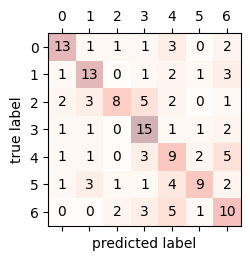


The precision score for kNN is: 0.550
Precision per class 0: 0.684
Precision per class 1: 0.591
Precision per class 2: 0.667
Precision per class 3: 0.517
Precision per class 4: 0.346
Precision per class 5: 0.643
Precision per class 6: 0.400


In [51]:
knn1.fit(X_train_pca, y_train)
y_pred = knn1.predict(X_test_pca)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
print()
print('The precision score for kNN is: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average = 'macro'))
pre_per_class = precision_score(y_true=y_test, y_pred=y_pred, average = None)
for i, precision in enumerate(pre_per_class):
    print(f"Precision per class {i}: {precision:.3f}")

In [15]:
#-------------------------------KSVC

In [52]:
n_samples, h, w = df2.images.shape
X = loaded_data
Y = loaded_target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

n_components = 150
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train_std)
eigenfaces = pca.components_.reshape((n_components, h, w))
t0 = time()
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

model3 = Pipeline([
        ('svc', SVC(random_state = 1))])

# Taken from scikit learn KSVM
param_grid = {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
            'svc__gamma': ['scale', 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 
              'svc__kernel': ['rbf']} 

gs3 = GridSearchCV(estimator=model3, param_grid = param_grid, scoring = 'accuracy', cv = 10, n_jobs =1)
gs3.fit(X_train_pca, y_train)
print(f'The best parameter for KSVM is: {gs3.best_params_}')
print(f'The best cross validation score/accuracy for KSVM is: {gs3.best_score_:.3f}')

The best parameter for KSVM is: {'svc__C': 10.0, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
The best cross validation score/accuracy for KSVM is: 0.688


In [53]:
ksvm1 = gs3.best_estimator_
ksvm1.fit(X_train_pca, y_train)
print('The training accuracy of ksvm is: %.3f' % ksvm1.score(X_train_pca, y_train))
print('The testing accuracy of ksvm is: %.3f' % ksvm1.score(X_test_pca, y_test))

The training accuracy of ksvm is: 1.000
The testing accuracy of ksvm is: 0.769


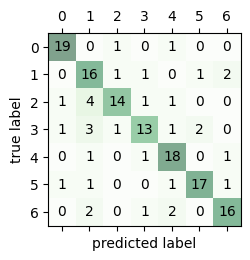


The precision score for KSVM is: 0.778
Precision per class 0: 0.864
Precision per class 1: 0.593
Precision per class 2: 0.824
Precision per class 3: 0.765
Precision per class 4: 0.750
Precision per class 5: 0.850
Precision per class 6: 0.800


In [54]:
ksvm1.fit(X_train_pca, y_train)
y_pred = ksvm1.predict(X_test_pca)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Greens, alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
print()
print('The precision score for KSVM is: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average = 'macro'))
pre_per_class = precision_score(y_true=y_test, y_pred=y_pred, average = None)
for i, precision in enumerate(pre_per_class):
    print(f"Precision per class {i}: {precision:.3f}")

In [24]:
#-------------------------------LSVM

In [58]:
n_samples, h, w = df2.images.shape
X = loaded_data
Y = loaded_target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

n_components = 150
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train_std)
eigenfaces = pca.components_.reshape((n_components, h, w))
t0 = time()
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

model4 = Pipeline([
        ('svc', SVC(random_state = 1))])
# Taken from scikit learn LSVM
param_grid = {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 10000.0],
              'svc__kernel': ['linear']} 

gs4 = GridSearchCV(estimator=model4, param_grid = param_grid, scoring = 'accuracy', cv = 10, n_jobs =1)
gs4.fit(X_train_pca, y_train)
print(f'The best parameter for LSVM is: {gs4.best_params_}')
print(f'The best cross validation score/accuracy for LSVM is: {gs4.best_score_:.3f}')

The best parameter for LSVM is: {'svc__C': 0.01, 'svc__kernel': 'linear'}
The best cross validation score/accuracy for LSVM is: 0.677


In [59]:
lsvm1 = gs4.best_estimator_
lsvm1.fit(X_train_pca, y_train)
print('The training accuracy of lsvm is: %.3f' % lsvm1.score(X_train_pca, y_train))
print('The testing accuracy of lsvm is: %.3f' % lsvm1.score(X_test_pca, y_test))

The training accuracy of lsvm is: 0.994
The testing accuracy of lsvm is: 0.755


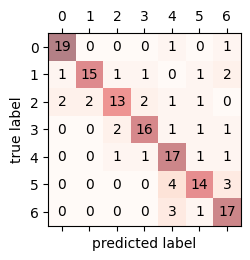


The precision score for LSVM is: 0.765
Precision per class 0: 0.864
Precision per class 1: 0.882
Precision per class 2: 0.765
Precision per class 3: 0.800
Precision per class 4: 0.630
Precision per class 5: 0.737
Precision per class 6: 0.680


In [60]:
lsvm1.fit(X_train_pca, y_train)
y_pred = lsvm1.predict(X_test_pca)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Reds, alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
print()
print('The precision score for LSVM is: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average = 'macro'))
pre_per_class = precision_score(y_true=y_test, y_pred=y_pred, average = None)
for i, precision in enumerate(pre_per_class):
    print(f"Precision per class {i}: {precision:.3f}")
    
